In [1]:
import numpy as np
import pandas as pd
from astropy.io import fits
from astropy.coordinates import SkyCoord
import astropy.units as u
import glob
import time
import gc

import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from matplotlib import rcParams
rcParams["font.family"] = "sans-serif"
rcParams['font.sans-serif'] = ['DejaVu Sans']

%matplotlib notebook

## Merge the PS1 RF catalogs and the Gaia obvi stars catalog

In [2]:
gaia_dir = "/Users/adamamiller/Desktop/PS1_fits/gaia_stars/"
gaia_df = pd.read_hdf(gaia_dir + "ps1_gaia_mag_pm_plx.h5")
gaia_df.set_index("objid", inplace=True)

In [3]:
ps1_files = glob.glob("/Users/adamamiller/Desktop/PS1_fits/hdf5/*h5")

In [4]:
tstart = time.time()
for file_num, rf_file in enumerate(ps1_files):

    rf_df = pd.read_hdf(rf_file)
    rf_df.set_index("objid", inplace=True)
    
    tmp_df = gaia_df.join(rf_df, how='inner')
    coords = SkyCoord(np.array(tmp_df.raStack)*u.deg, np.array(tmp_df.decStack)*u.deg)
    tmp_df["b"] = coords.galactic.b
    tmp_df.to_hdf(gaia_dir + "tmp{}.h5".format(file_num), "d1")
    if file_num == 0:
        print(file_num, rf_file.split("/")[-1], 
              len(tmp_df),
              time.time() - tstart)
    else:
        print(file_num, rf_file.split("/")[-1], 
              len(tmp_df),
              time.time() - tnow)

    tnow = time.time()
    
    del rf_df
    del tmp_df
    gc.collect()
    

0 dec_0_0_classifications.h5 323351 88.48137307167053
1 dec_0_33_classifications.h5 298352 38.993029832839966
2 dec_0_66_classifications.h5 290639 37.633047580718994
3 dec_10_0_classifications.h5 372842 35.890201807022095
4 dec_10_33_classifications.h5 371629 32.35372281074524
5 dec_10_66_classifications.h5 375409 31.906549215316772
6 dec_11_0_classifications.h5 381654 31.49407196044922
7 dec_11_33_classifications.h5 399806 31.61418128013611
8 dec_11_66_classifications.h5 412593 31.6408588886261
9 dec_12_0_classifications.h5 406828 31.70437502861023
10 dec_12_33_classifications.h5 403433 31.677855968475342
11 dec_12_66_classifications.h5 403399 31.40728783607483
12 dec_13_0_classifications.h5 391141 31.55268406867981
13 dec_13_33_classifications.h5 392387 32.416834592819214
14 dec_13_66_classifications.h5 400825 32.074981927871704
15 dec_14_0_classifications.h5 403119 32.784544944763184
16 dec_14_33_classifications.h5 403325 32.50344491004944
17 dec_14_66_classifications.h5 405453 33.4

142 dec_52_33_classifications.h5 354967 28.468089818954468
143 dec_52_66_classifications.h5 352413 28.5656898021698
144 dec_53_0_classifications.h5 349891 28.48351216316223
145 dec_53_33_classifications.h5 351669 28.454715728759766
146 dec_53_66_classifications.h5 350831 28.375540256500244
147 dec_54_0_classifications.h5 348537 28.47271990776062
148 dec_54_33_classifications.h5 352325 28.502422094345093
149 dec_54_66_classifications.h5 349571 28.512372970581055
150 dec_55_0_classifications.h5 338857 28.469349145889282
151 dec_55_33_classifications.h5 337386 28.431642770767212
152 dec_55_66_classifications.h5 335099 28.772657871246338
153 dec_56_0_classifications.h5 327213 28.548595905303955
154 dec_56_33_classifications.h5 334061 28.756224870681763
155 dec_56_66_classifications.h5 334382 28.442685842514038
156 dec_57_0_classifications.h5 329657 28.375306129455566
157 dec_57_33_classifications.h5 315894 29.44795274734497
158 dec_57_66_classifications.h5 303632 28.012202978134155
159 dec

283 dec_neg13_66_classifications.h5 383604 29.192986011505127
284 dec_neg14_0_classifications.h5 398707 29.156646966934204
285 dec_neg14_33_classifications.h5 402481 29.22347092628479
286 dec_neg14_66_classifications.h5 412456 29.246264219284058
287 dec_neg15_0_classifications.h5 426094 30.259429216384888
288 dec_neg15_33_classifications.h5 427878 31.774952173233032
289 dec_neg15_66_classifications.h5 441165 30.18413019180298
290 dec_neg16_0_classifications.h5 444232 29.913670301437378
291 dec_neg16_33_classifications.h5 442537 29.86177921295166
292 dec_neg16_66_classifications.h5 446511 29.932971000671387
293 dec_neg17_0_classifications.h5 457786 30.005598783493042
294 dec_neg17_33_classifications.h5 471040 29.8989999294281
295 dec_neg17_66_classifications.h5 478675 29.800997018814087
296 dec_neg18_0_classifications.h5 495115 29.81590509414673
297 dec_neg18_33_classifications.h5 498681 29.78335213661194
298 dec_neg18_66_classifications.h5 486287 29.74105191230774
299 dec_neg19_0_class

In [5]:
del gaia_df
gc.collect()

14

In [6]:
tmp_files = glob.glob(gaia_dir + "tmp*h5")

for file_num, tmp_file in enumerate(tmp_files):

    exec("tmp_df{} = pd.read_hdf(tmp_file)".format(file_num))

In [7]:
df_list = [tmp_df0, tmp_df1, tmp_df2, tmp_df3, tmp_df4, tmp_df5, tmp_df6, tmp_df7, tmp_df8, tmp_df9, tmp_df10, tmp_df11, tmp_df12, tmp_df13, tmp_df14, tmp_df15, tmp_df16, tmp_df17, tmp_df18, tmp_df19, tmp_df20, tmp_df21, tmp_df22, tmp_df23, tmp_df24, tmp_df25, tmp_df26, tmp_df27, tmp_df28, tmp_df29, tmp_df30, tmp_df31, tmp_df32, tmp_df33, tmp_df34, tmp_df35, tmp_df36, tmp_df37, tmp_df38, tmp_df39, tmp_df40, tmp_df41, tmp_df42, tmp_df43, tmp_df44, tmp_df45, tmp_df46, tmp_df47, tmp_df48, tmp_df49, tmp_df50, tmp_df51, tmp_df52, tmp_df53, tmp_df54, tmp_df55, tmp_df56, tmp_df57, tmp_df58, tmp_df59, tmp_df60, tmp_df61, tmp_df62, tmp_df63, tmp_df64, tmp_df65, tmp_df66, tmp_df67, tmp_df68, tmp_df69, tmp_df70, tmp_df71, tmp_df72, tmp_df73, tmp_df74, tmp_df75, tmp_df76, tmp_df77, tmp_df78, tmp_df79, tmp_df80, tmp_df81, tmp_df82, tmp_df83, tmp_df84, tmp_df85, tmp_df86, tmp_df87, tmp_df88, tmp_df89, tmp_df90, tmp_df91, tmp_df92, tmp_df93, tmp_df94, tmp_df95, tmp_df96, tmp_df97, tmp_df98, tmp_df99, tmp_df100, tmp_df101, tmp_df102, tmp_df103, tmp_df104, tmp_df105, tmp_df106, tmp_df107, tmp_df108, tmp_df109, tmp_df110, tmp_df111, tmp_df112, tmp_df113, tmp_df114, tmp_df115, tmp_df116, tmp_df117, tmp_df118, tmp_df119, tmp_df120, tmp_df121, tmp_df122, tmp_df123, tmp_df124, tmp_df125, tmp_df126, tmp_df127, tmp_df128, tmp_df129, tmp_df130, tmp_df131, tmp_df132, tmp_df133, tmp_df134, tmp_df135, tmp_df136, tmp_df137, tmp_df138, tmp_df139, tmp_df140, tmp_df141, tmp_df142, tmp_df143, tmp_df144, tmp_df145, tmp_df146, tmp_df147, tmp_df148, tmp_df149, tmp_df150, tmp_df151, tmp_df152, tmp_df153, tmp_df154, tmp_df155, tmp_df156, tmp_df157, tmp_df158, tmp_df159, tmp_df160, tmp_df161, tmp_df162, tmp_df163, tmp_df164, tmp_df165, tmp_df166, tmp_df167, tmp_df168, tmp_df169, tmp_df170, tmp_df171, tmp_df172, tmp_df173, tmp_df174, tmp_df175, tmp_df176, tmp_df177, tmp_df178, tmp_df179, tmp_df180, tmp_df181, tmp_df182, tmp_df183, tmp_df184, tmp_df185, tmp_df186, tmp_df187, tmp_df188, tmp_df189, tmp_df190, tmp_df191, tmp_df192, tmp_df193, tmp_df194, tmp_df195, tmp_df196, tmp_df197, tmp_df198, tmp_df199, tmp_df200, tmp_df201, tmp_df202, tmp_df203, tmp_df204, tmp_df205, tmp_df206, tmp_df207, tmp_df208, tmp_df209, tmp_df210, tmp_df211, tmp_df212, tmp_df213, tmp_df214, tmp_df215, tmp_df216, tmp_df217, tmp_df218, tmp_df219, tmp_df220, tmp_df221, tmp_df222, tmp_df223, tmp_df224, tmp_df225, tmp_df226, tmp_df227, tmp_df228, tmp_df229, tmp_df230, tmp_df231, tmp_df232, tmp_df233, tmp_df234, tmp_df235, tmp_df236, tmp_df237, tmp_df238, tmp_df239, tmp_df240, tmp_df241, tmp_df242, tmp_df243, tmp_df244, tmp_df245, tmp_df246, tmp_df247, tmp_df248, tmp_df249, tmp_df250, tmp_df251, tmp_df252, tmp_df253, tmp_df254, tmp_df255, tmp_df256, tmp_df257, tmp_df258, tmp_df259, tmp_df260, tmp_df261, tmp_df262, tmp_df263, tmp_df264, tmp_df265, tmp_df266, tmp_df267, tmp_df268, tmp_df269, tmp_df270, tmp_df271, tmp_df272, tmp_df273, tmp_df274, tmp_df275, tmp_df276, tmp_df277, tmp_df278, tmp_df279, tmp_df280, tmp_df281, tmp_df282, tmp_df283, tmp_df284, tmp_df285, tmp_df286, tmp_df287, tmp_df288, tmp_df289, tmp_df290, tmp_df291, tmp_df292, tmp_df293, tmp_df294, tmp_df295, tmp_df296, tmp_df297, tmp_df298, tmp_df299, tmp_df300, tmp_df301, tmp_df302, tmp_df303, tmp_df304, tmp_df305, tmp_df306, tmp_df307, tmp_df308, tmp_df309, tmp_df310, tmp_df311, tmp_df312, tmp_df313, tmp_df314, tmp_df315, tmp_df316, tmp_df317, tmp_df318, tmp_df319, tmp_df320, tmp_df321, tmp_df322, tmp_df323, tmp_df324, tmp_df325, tmp_df326, tmp_df327, tmp_df328, tmp_df329, tmp_df330, tmp_df331, tmp_df332, tmp_df333, tmp_df334, tmp_df335, tmp_df336, tmp_df337, tmp_df338, tmp_df339, tmp_df340, tmp_df341, tmp_df342, tmp_df343, tmp_df344, tmp_df345, tmp_df346, tmp_df347, tmp_df348, tmp_df349, tmp_df350, tmp_df351, tmp_df352, tmp_df353, tmp_df354, tmp_df355, tmp_df356, tmp_df357, tmp_df358, tmp_df359, tmp_df360, tmp_df361, tmp_df362, tmp_df363, tmp_df364, tmp_df365]

In [8]:
merge_df = pd.concat(df_list)

In [9]:
merge_df.to_hdf("ps1_gaia_cat_merge.h5", "d1")

## Start here if the merge file has already been created

In [2]:
merge_df = pd.read_hdf("ps1_gaia_cat_merge.h5")

In [10]:
merge_df[0:10]

,pm_over_error,parallax_over_error,g_mag,raStack,decStack,qualityFlag,rf_score,b
objid,,,,,,,,
108233194005024977,26.970131,-1.181889,15.999909,319.400503,0.195455,60,0.998750,-31.893277
108102913771940072,9.123205,0.750711,18.055126,291.377183,0.083230,60,0.952125,-7.536518
108263000609202733,11.015263,3.331446,19.341421,300.060919,0.218579,52,0.920036,-15.156507
108092452775284029,11.677012,2.451137,17.890778,245.277534,0.077997,60,1.000000,32.916752
108062923894438102,9.241834,1.797469,18.179464,292.389437,0.056400,60,0.945250,-8.447345
108152981819389634,17.823945,7.257924,14.644627,298.181935,0.132668,60,0.952875,-13.539983
108230440007853580,19.578372,24.310646,16.655472,44.000779,0.194295,60,0.858292,-49.480532
108112744224976041,17.709087,8.646008,17.485947,274.422486,0.096343,60,0.991250,7.547444
108212750025199321,12.314312,8.671021,17.028746,275.002526,0.182397,52,0.967667,7.071775


In [30]:
np.percentile(merge_df["rf_score"], [0.47625,4.25,50,89.37,89.38])

array([ 0.50001786,  0.83004167,  0.98504762,  0.9996875 ,  1.        ])

In [31]:
len(merge_df)

118824720

The above percentile call reveals the following:

  - 10.6% of these Gaia stars have PS1_rf = 1
  - 50% of these Gaia stars have PS1_df > 0.98504762
  - 95.75% of these Gaia stars have PS1_df > .83 [the threshold for scanning]
  - 99.52% of these Gaia stars have PS1_df > .5 [classical classification threshold

In [12]:
high_lat = np.where(np.abs(merge_df['b'] > 30))
low_lat = np.where(np.abs(merge_df['b'] < 10))

In [13]:
col_dict = {'mustard': (226/256,153/256,48/256,1),
            'blue': (33/256,124/256,163/256, 1),
            'asphalt': (50/256,56/256,77/256, 1),
            'pale_mustard': (226/256,153/256,48/256,0.4),
            'pale_blue': (33/256,124/256,163/256,0.4),
            'pale_asphalt': (50/256,56/256,77/256,0.4)
           }
thresh = 0.83 #for nDet>2 sources

<IPython.core.display.Javascript object>


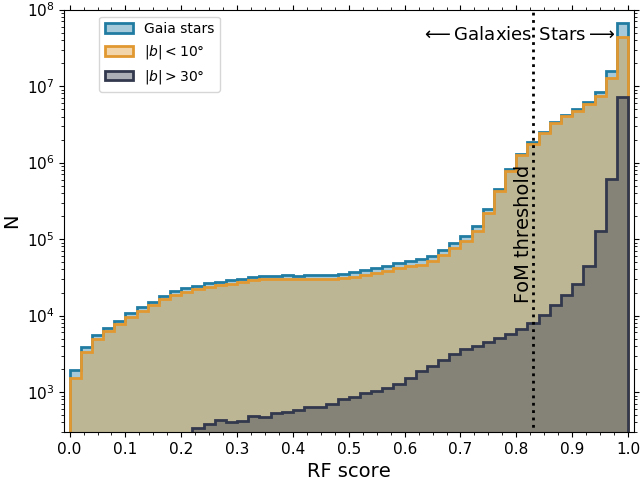

In [14]:
fig, ax = plt.subplots()
ax.hist(merge_df["rf_score"], bins=50,
        histtype='stepfilled', 
        edgecolor=col_dict['blue'], linewidth=2,
        facecolor=col_dict['pale_blue'], label="Gaia stars")
ax.hist(merge_df["rf_score"].iloc[low_lat], bins=50,
        histtype='stepfilled', 
        edgecolor=col_dict['mustard'], linewidth=2,
        facecolor=col_dict['pale_mustard'], label=r"$|b| < 10\degree$")

ax.hist(merge_df["rf_score"].iloc[high_lat], bins=50,
        histtype='stepfilled', 
        edgecolor=col_dict['asphalt'], linewidth=2,
        facecolor=col_dict['pale_asphalt'], label=r"$|b| > 30\degree$")

ax.set_yscale("log")
ax.set_xlim(-0.01, 1.01)
ax.set_ylim(3e2, 1e8)
ax.tick_params(which="both", top=True, right=True, labelsize=11)
ax.xaxis.set_major_locator(MultipleLocator(0.1))
ax.xaxis.set_minor_locator(MultipleLocator(0.025))
ax.set_xlabel("RF score", fontsize=14)
ax.set_ylabel("N", fontsize=14)

ax.vlines([thresh], 10, 1e9, 
          linestyles=":", 
          color='k', lw=2, zorder=11)
ax.text(thresh, 6e5, 'FoM threshold', 
        color='k', 
        rotation=90, ha="right", fontsize=14)
ax.text(thresh, 4e7, r'$\longleftarrow \mathrm{Galaxies}$ ', 
        color='k', 
        ha="right", fontsize=13)
ax.text(thresh, 4e7, r' $\mathrm{Stars} \longrightarrow$', 
        color='k', 
        ha="left", fontsize=13)

ax.legend(loc=2, bbox_to_anchor = (0.05,0,1,1), 
          bbox_transform=ax.transAxes)

fig.subplots_adjust(left=0.1,right=0.99,top=0.98,bottom=0.1)
fig.savefig("../paper/Figures/Gaia_PS1_cat_hist.pdf")

<IPython.core.display.Javascript object>


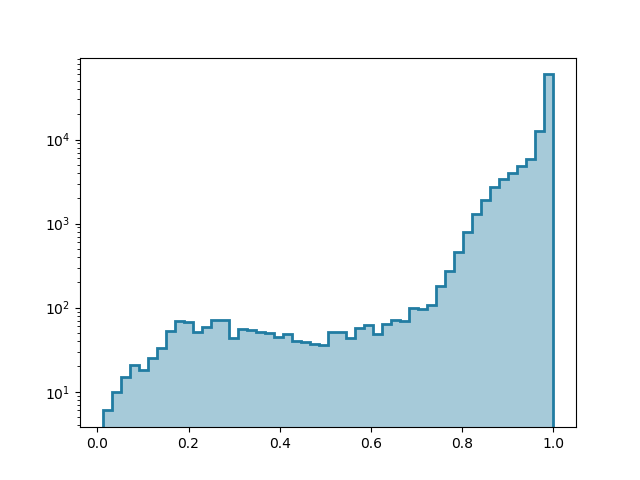

In [40]:
fig, ax = plt.subplots()
ax.hist(merge_df["rf_score"][0:100000], bins=50,
        histtype='stepfilled', 
        edgecolor=col_dict['blue'], linewidth=2,
        facecolor=col_dict['pale_blue'], label="Gaia stars")
ax.set_yscale('log')